9-1 순차 데이터와 순환신경망 부분은 이론 설명만 있어서 코드는 따로 없었음!

토큰에 할당되는 정수중에 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰

In [2]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [4]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [8]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(len(train_input[0]))

218


In [7]:
print(len(train_input[1]))

189


In [9]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [10]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [11]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [12]:
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [13]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


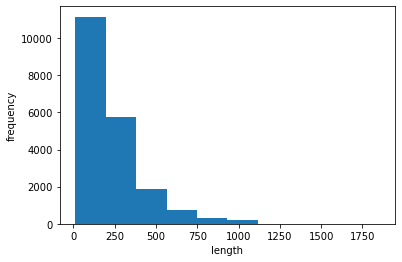

In [14]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

100개로 리뷰의 길이를 맞춰주자! 

이거보다 작은거는 padding으로 0 채워주기

pad_sequence()함수

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [17]:
print(train_seq.shape)

(20000, 100)


In [18]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [20]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


샘플의 앞에서 잘렸다!

시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문

pad_sequence()의 parameter truncating을 post로 지정시 뒤에서 부터 짜른다고함

같은 이유로 패딩도 앞에서부터 추가가 된다. 

시퀀스의 맨 마지막 부분이 hidden state에 가장 많은 영향을 미치게 되기때문에

In [23]:
val_seq = pad_sequences(val_input, maxlen=100)

순환 신경망 만들기

In [24]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500))) # activation tanh default
model.add(keras.layers.Dense(1, activation='sigmoid'))

원핫 인코딩 해줘야함! 500차원

In [25]:
train_oh = keras.utils.to_categorical(train_seq)

In [26]:
print(train_oh.shape)

(20000, 100, 500)


In [27]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [29]:
print(np.sum(train_oh[0][0]))

1.0


In [30]:
val_oh = keras.utils.to_categorical(val_seq)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [33]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stoppint_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh,val_target), \
                   callbacks=[checkpoint_cb, early_stoppint_cb])

Epoch 1/100
313/313 [==============================] - 6s 15ms/step - loss: 0.7009 - accuracy: 0.5006 - val_loss: 0.7009 - val_accuracy: 0.4902
Epoch 2/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6964 - accuracy: 0.5062 - val_loss: 0.6982 - val_accuracy: 0.4936
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6937 - accuracy: 0.5160 - val_loss: 0.6963 - val_accuracy: 0.4988
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6916 - accuracy: 0.5227 - val_loss: 0.6949 - val_accuracy: 0.5004
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6899 - accuracy: 0.5311 - val_loss: 0.6938 - val_accuracy: 0.5042
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6883 - accuracy: 0.5390 - val_loss: 0.6929 - val_accuracy: 0.5084
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6868 - accuracy: 0.5455 - val_loss: 0.6921 - val_accuracy:

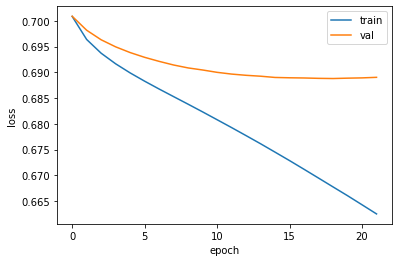

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [35]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


단어 임베딩 사용하기

In [51]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8)) # activation tanh default
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [52]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [53]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stoppint_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), 
                   callbacks=[checkpoint_cb, early_stoppint_cb])

Epoch 1/100
313/313 [==============================] - 5s 12ms/step - loss: 0.6959 - accuracy: 0.5051 - val_loss: 0.6933 - val_accuracy: 0.5192
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6904 - accuracy: 0.5264 - val_loss: 0.6907 - val_accuracy: 0.5284
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6862 - accuracy: 0.5466 - val_loss: 0.6886 - val_accuracy: 0.5416
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6823 - accuracy: 0.5685 - val_loss: 0.6868 - val_accuracy: 0.5458
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6785 - accuracy: 0.5783 - val_loss: 0.6852 - val_accuracy: 0.5512
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6748 - accuracy: 0.5864 - val_loss: 0.6837 - val_accuracy: 0.5496
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6713 - accuracy: 0.5943 - val_loss: 0.6826 - val_accuracy:

313/313 [==============================] - 11s 37ms/step - loss: 0.5028 - accuracy: 0.7641 - val_loss: 0.6353 - val_accuracy: 0.6528
Epoch 58/100
313/313 [==============================] - 8s 26ms/step - loss: 0.4995 - accuracy: 0.7654 - val_loss: 0.6364 - val_accuracy: 0.6540
Epoch 59/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4963 - accuracy: 0.7670 - val_loss: 0.6335 - val_accuracy: 0.6600
Epoch 60/100
313/313 [==============================] - 6s 18ms/step - loss: 0.4931 - accuracy: 0.7699 - val_loss: 0.6335 - val_accuracy: 0.6606
Epoch 61/100
313/313 [==============================] - 6s 18ms/step - loss: 0.4899 - accuracy: 0.7728 - val_loss: 0.6337 - val_accuracy: 0.6640
Epoch 62/100
313/313 [==============================] - 6s 18ms/step - loss: 0.4868 - accuracy: 0.7757 - val_loss: 0.6306 - val_accuracy: 0.6646
Epoch 63/100
313/313 [==============================] - 6s 18ms/step - loss: 0.4835 - accuracy: 0.7794 - val_loss: 0.6334 - val_accuracy: 0.66

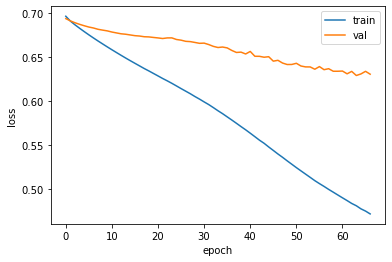

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()